In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical 
import random

In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape) #60000 images with each 28X28
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images isn't equal to the number of labels" #if this condition is not met show errror
assert(X_test.shape[0] == y_test.shape[0]), "The number of images isn't equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimentions of the image" #[1:] from 1 till the last
assert(X_test.shape[1:] == (28,28)), "The dimentions of the image"

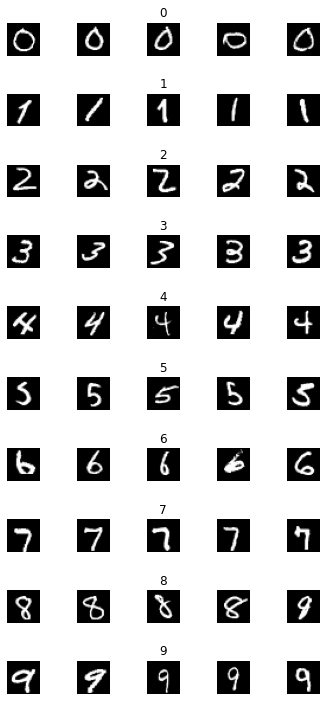

In [6]:
#display some MNISTs
num_of_samples = []
cols = 5
num_rows = 10
fig, axis = plt.subplots(nrows=num_rows, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range (cols):
    for j in range (num_rows):
        selectedNum = X_train[y_train == j] #X is all the images' pixel values and y is the value of those images eg: X_train[0,0,0] means top left pixel is black, 28X28 of all these individual values makes up the 1 image
        axis[j][i].imshow(selectedNum[random.randint(0, len(selectedNum-1)),:,:],cmap=plt.get_cmap("gray")) #here selectedNum has equal length to that of X_train
        axis[j][i].axis("off") 
        if i == 2:
            axis[j][i].set_title(str(j))

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#making the max possible pixel value 1
X_train = X_train/255
X_test  = X_test/255

In [8]:
#making the image data 1D since we have to do matrix multiplications
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_rows, activation='softmax'))#as softmax is good at looking at different probabilities in the output and selecting the highest one
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
#print(model.summary())

history = model.fit(X_train, y_train, validation_split=0.1, verbose=1, batch_size = 200, epochs = 10, shuffle = 1) #here loss in the results would means the inaccuracy in the training data i.e, how many traning data is incorrectly classified. The validation_split is the percent of data given for hyperParameters(which is just everything in the neural network except wait and biases, therefore the learning rate and stuff)

Epoch 1/10
270/270 [==============================] - 3s 7ms/step - loss: 0.9504 - accuracy: 0.6781 - val_loss: 0.3405 - val_accuracy: 0.9003
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8923 - val_loss: 0.2930 - val_accuracy: 0.9165
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.9001 - val_loss: 0.2631 - val_accuracy: 0.9207
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9064 - val_loss: 0.2516 - val_accuracy: 0.9245
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2982 - accuracy: 0.9105 - val_loss: 0.2555 - val_accuracy: 0.9233
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9144 - val_loss: 0.2536 - val_accuracy: 0.9240
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.9141 - val_loss: 0.2462 - val_accuracy: 0.9272
Epoch 

Text(0.5, 0, 'epoch')

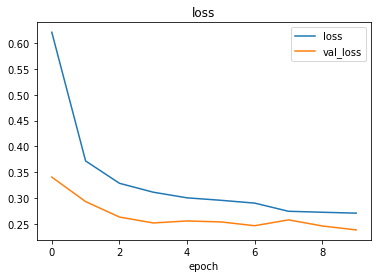

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title("loss")
plt.xlabel('epoch')
#if the training loss is less than val_loss, that means our network is starting to memorize the traning data, our data aren't tested on the val_loss, they are there just to test our network

Text(0.5, 0, 'epoch')

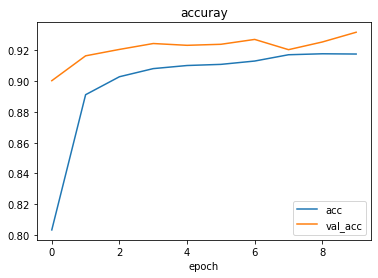

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title("accuray")
plt.xlabel('epoch')

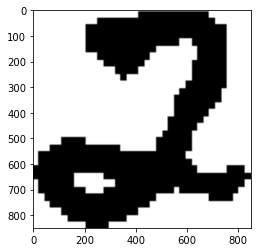

In [13]:
#feeding the image from a URL
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

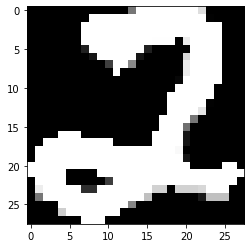

In [14]:
#making the image an array and converting it into b&w as rn it is rbg
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [15]:
image = image/255
image = image.reshape(1,784) 

In [16]:
#time to predict
prediction = model.predict_classes(image)
print("The number is: ", str(prediction))

The number is:  [3]


/Volumes/MyData/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
